# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
# tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

True

In [7]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [8]:
tf.reset_default_graph()

In [9]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 30
env_name = 'Small'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/blbudima/miniconda3/envs/sgm/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [10]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 993/30000 [00:15<05:47, 83.58it/s] 

Saved checkpoint for step 1000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.876866
INFO:tensorflow:71.032 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.50
INFO:tensorflow:		 predicted_dist = 20.5 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 21.9 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.90
INFO:tensorflow:		 predicted_dist = 22.9 (0.6)
INFO:tensorflow:	 eval_time = 4.63


  7%|▋         | 1993/30000 [00:31<05:15, 88.84it/s]  

Saved checkpoint for step 2000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 1.757391
INFO:tensorflow:98.556 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -24.60
INFO:tensorflow:		 predicted_dist = 22.7 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.60
INFO:tensorflow:		 predicted_dist = 25.0 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 26.3 (1.0)
INFO:tensorflow:	 eval_time = 3.79


 10%|▉         | 2992/30000 [00:46<04:38, 97.08it/s]  

Saved checkpoint for step 3000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 1.274659
INFO:tensorflow:99.198 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.50
INFO:tensorflow:		 predicted_dist = 25.4 (3.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.50
INFO:tensorflow:		 predicted_dist = 25.2 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 24.1 (3.0)
INFO:tensorflow:	 eval_time = 3.79


 13%|█▎        | 3990/30000 [01:01<04:26, 97.68it/s] 

Saved checkpoint for step 4000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 2.193802
INFO:tensorflow:102.734 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -15.00
INFO:tensorflow:		 predicted_dist = 20.6 (5.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.70
INFO:tensorflow:		 predicted_dist = 24.9 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.00
INFO:tensorflow:		 predicted_dist = 26.1 (1.7)
INFO:tensorflow:	 eval_time = 3.38


 17%|█▋        | 4996/30000 [01:14<03:52, 107.74it/s]

Saved checkpoint for step 5000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 2.843506
INFO:tensorflow:116.696 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 13.0 (3.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 20.6 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.90
INFO:tensorflow:		 predicted_dist = 24.7 (1.6)
INFO:tensorflow:	 eval_time = 2.35


 20%|█▉        | 5992/30000 [01:28<04:56, 81.11it/s] 

Saved checkpoint for step 6000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 3.364667
INFO:tensorflow:102.430 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.60
INFO:tensorflow:		 predicted_dist = 9.3 (2.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 16.2 (2.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.00
INFO:tensorflow:		 predicted_dist = 22.1 (2.2)
INFO:tensorflow:	 eval_time = 2.22


 23%|██▎       | 6992/30000 [01:41<03:43, 103.13it/s]

Saved checkpoint for step 7000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 3.290234
INFO:tensorflow:100.593 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 6.9 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 11.3 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.10
INFO:tensorflow:		 predicted_dist = 19.2 (2.6)
INFO:tensorflow:	 eval_time = 2.36


 27%|██▋       | 7996/30000 [01:54<03:51, 94.90it/s] 

Saved checkpoint for step 8000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 3.282683
INFO:tensorflow:112.562 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 6.4 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 9.6 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 19.2 (2.1)
INFO:tensorflow:	 eval_time = 2.43


 30%|██▉       | 8993/30000 [02:06<03:15, 107.40it/s]

Saved checkpoint for step 9000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 3.069653
INFO:tensorflow:113.423 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.30
INFO:tensorflow:		 predicted_dist = 5.3 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.30
INFO:tensorflow:		 predicted_dist = 9.5 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.50
INFO:tensorflow:		 predicted_dist = 18.0 (3.7)
INFO:tensorflow:	 eval_time = 2.06


 33%|███▎      | 9994/30000 [02:18<03:12, 103.72it/s]

Saved checkpoint for step 10000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 3.366985
INFO:tensorflow:109.572 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.80
INFO:tensorflow:		 predicted_dist = 6.9 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 10.7 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 19.1 (2.5)
INFO:tensorflow:	 eval_time = 1.95


 37%|███▋      | 10994/30000 [02:30<03:14, 97.64it/s] 

Saved checkpoint for step 11000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 3.260845
INFO:tensorflow:114.466 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 6.0 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 9.0 (2.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.90
INFO:tensorflow:		 predicted_dist = 19.6 (2.6)
INFO:tensorflow:	 eval_time = 1.93


 40%|███▉      | 11999/30000 [02:44<04:00, 74.91it/s] 

Saved checkpoint for step 12000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 3.564884
INFO:tensorflow:101.152 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.40
INFO:tensorflow:		 predicted_dist = 3.9 (0.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 8.9 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.50
INFO:tensorflow:		 predicted_dist = 16.8 (2.9)
INFO:tensorflow:	 eval_time = 2.20


 43%|████▎     | 12992/30000 [02:57<03:15, 87.21it/s]

Saved checkpoint for step 13000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 3.451797
INFO:tensorflow:99.465 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.80
INFO:tensorflow:		 predicted_dist = 5.5 (0.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.30
INFO:tensorflow:		 predicted_dist = 9.2 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.70
INFO:tensorflow:		 predicted_dist = 15.8 (3.6)
INFO:tensorflow:	 eval_time = 2.24


 47%|████▋     | 13992/30000 [03:10<02:54, 91.68it/s] 

Saved checkpoint for step 14000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 3.386724
INFO:tensorflow:111.387 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.20
INFO:tensorflow:		 predicted_dist = 4.9 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 7.8 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 16.3 (3.3)
INFO:tensorflow:	 eval_time = 2.01


 50%|████▉     | 14999/30000 [03:23<03:50, 65.18it/s] 

Saved checkpoint for step 15000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 3.232123
INFO:tensorflow:102.365 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 4.1 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 9.0 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.70
INFO:tensorflow:		 predicted_dist = 14.7 (3.4)
INFO:tensorflow:	 eval_time = 2.26


 53%|█████▎    | 15997/30000 [03:36<02:28, 94.48it/s]

Saved checkpoint for step 16000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 2.942128
INFO:tensorflow:102.080 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 5.0 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.00
INFO:tensorflow:		 predicted_dist = 8.3 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.30
INFO:tensorflow:		 predicted_dist = 16.0 (2.0)
INFO:tensorflow:	 eval_time = 2.06


 57%|█████▋    | 16997/30000 [03:49<02:02, 106.13it/s]

Saved checkpoint for step 17000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 2.859680
INFO:tensorflow:104.650 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 4.3 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 9.4 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.60
INFO:tensorflow:		 predicted_dist = 16.1 (2.1)
INFO:tensorflow:	 eval_time = 2.23


 60%|█████▉    | 17997/30000 [04:02<02:09, 92.96it/s] 

Saved checkpoint for step 18000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 3.276873
INFO:tensorflow:110.908 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.70
INFO:tensorflow:		 predicted_dist = 5.2 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.00
INFO:tensorflow:		 predicted_dist = 9.3 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 18.8 (1.8)
INFO:tensorflow:	 eval_time = 2.28


 63%|██████▎   | 18993/30000 [04:15<02:05, 87.64it/s] 

Saved checkpoint for step 19000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 3.034855
INFO:tensorflow:103.990 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 4.3 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.90
INFO:tensorflow:		 predicted_dist = 8.0 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.30
INFO:tensorflow:		 predicted_dist = 16.2 (1.9)
INFO:tensorflow:	 eval_time = 2.09


 67%|██████▋   | 19994/30000 [04:28<01:52, 88.72it/s] 

Saved checkpoint for step 20000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 3.060024
INFO:tensorflow:104.341 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 4.7 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 9.1 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.30
INFO:tensorflow:		 predicted_dist = 19.0 (2.8)
INFO:tensorflow:	 eval_time = 2.14


 70%|██████▉   | 20999/30000 [04:42<02:32, 58.97it/s] 

Saved checkpoint for step 21000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 3.258309
INFO:tensorflow:96.181 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 4.4 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.40
INFO:tensorflow:		 predicted_dist = 9.1 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 16.3 (3.8)
INFO:tensorflow:	 eval_time = 2.18


 73%|███████▎  | 21999/30000 [04:54<01:49, 73.13it/s] 

Saved checkpoint for step 22000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.037920
INFO:tensorflow:108.392 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 4.5 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 8.1 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.80
INFO:tensorflow:		 predicted_dist = 16.1 (1.8)
INFO:tensorflow:	 eval_time = 2.23


 77%|███████▋  | 22997/30000 [05:07<01:14, 94.26it/s] 

Saved checkpoint for step 23000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.030012
INFO:tensorflow:107.988 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 4.0 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 8.9 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.70
INFO:tensorflow:		 predicted_dist = 17.6 (3.1)
INFO:tensorflow:	 eval_time = 2.18


 80%|███████▉  | 23995/30000 [05:19<00:55, 107.66it/s]

Saved checkpoint for step 24000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 2.696296
INFO:tensorflow:111.711 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 3.8 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 7.8 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 15.8 (2.4)
INFO:tensorflow:	 eval_time = 2.19


 83%|████████▎ | 24998/30000 [05:32<01:01, 81.06it/s] 

Saved checkpoint for step 25000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 2.774619
INFO:tensorflow:110.039 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 4.7 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.30
INFO:tensorflow:		 predicted_dist = 8.9 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.00
INFO:tensorflow:		 predicted_dist = 15.9 (1.9)
INFO:tensorflow:	 eval_time = 2.34


 87%|████████▋ | 25991/30000 [05:45<00:46, 86.78it/s] 

Saved checkpoint for step 26000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.006181
INFO:tensorflow:106.521 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 4.1 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.10
INFO:tensorflow:		 predicted_dist = 8.2 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.30
INFO:tensorflow:		 predicted_dist = 15.2 (1.8)
INFO:tensorflow:	 eval_time = 2.29


 90%|████████▉ | 26989/30000 [05:57<00:27, 107.89it/s]

Saved checkpoint for step 27000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 3.017814
INFO:tensorflow:118.584 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 4.4 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 7.5 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.40
INFO:tensorflow:		 predicted_dist = 15.2 (1.7)
INFO:tensorflow:	 eval_time = 2.18


 93%|█████████▎| 27994/30000 [06:09<00:21, 92.20it/s] 

Saved checkpoint for step 28000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 2.889988
INFO:tensorflow:112.685 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 4.1 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.30
INFO:tensorflow:		 predicted_dist = 7.7 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.00
INFO:tensorflow:		 predicted_dist = 15.7 (3.2)
INFO:tensorflow:	 eval_time = 2.29


 97%|█████████▋| 28998/30000 [06:22<00:09, 108.97it/s]

Saved checkpoint for step 29000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 2.645350
INFO:tensorflow:113.447 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 4.2 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 7.5 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 15.8 (2.9)
INFO:tensorflow:	 eval_time = 2.19


100%|█████████▉| 29998/30000 [06:33<00:00, 101.15it/s]

Saved checkpoint for step 30000: /home/blbudima/sgm/notebooks/../agents/thinned_small/Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 2.515657
INFO:tensorflow:118.334 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 4.5 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 8.1 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.70
INFO:tensorflow:		 predicted_dist = 14.4 (2.1)
INFO:tensorflow:	 eval_time = 2.16


100%|██████████| 30000/30000 [06:36<00:00, 75.70it/s] 


LossInfo(loss=<tf.Tensor: id=1149426, shape=(), dtype=float32, numpy=2.5156574>, extra=(<tf.Tensor: id=1149427, shape=(), dtype=float32, numpy=0.46426404>, <tf.Tensor: id=1149428, shape=(), dtype=float32, numpy=2.0513933>))

# Load trained model into agent

In [11]:
filename = "Small_coordinate_30steps-May-12-2021-11-52-34-AM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [12]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=10)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

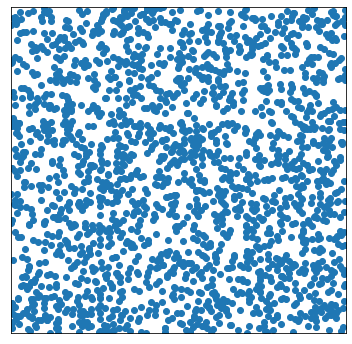

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [14]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

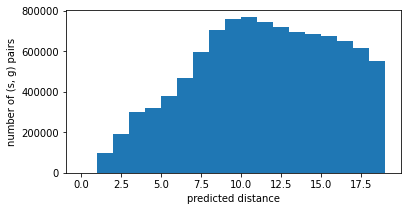

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 232 nodes and 15460 edges


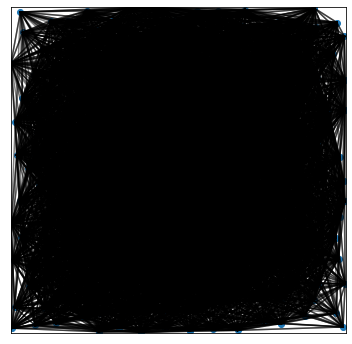

In [16]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 1160 edges


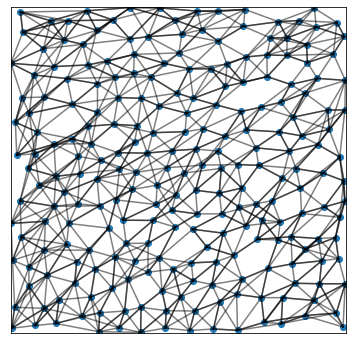

In [17]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 928 edges


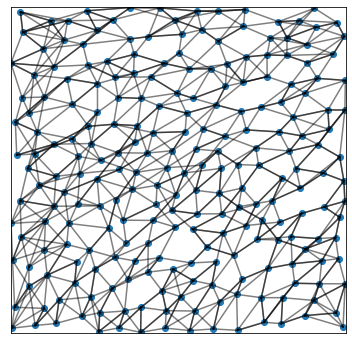

In [18]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 696 edges


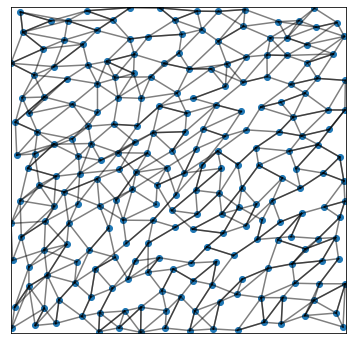

In [19]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 464 edges


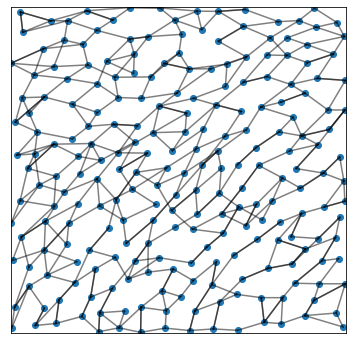

In [20]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 232 edges


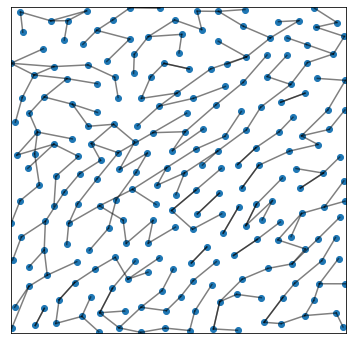

In [21]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

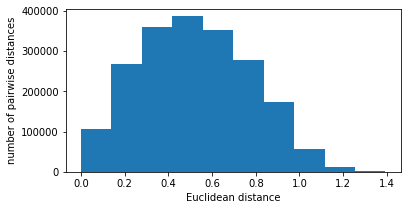

In [22]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [23]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

# Cleanup and evaluate SGM

In [24]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 1.00
Evaluated initial SGM success rate in 125.57 seconds
After filtering and 0 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 634.23 seconds
After filtering and 5000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 663.67 seconds
After filtering and 10000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 623.79 seconds
After filtering and 15000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 634.05 seconds
After filtering and 20000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 662.92 seconds
After filtering and 25000 cleanup steps, SGM has success rate 1.00
Took 5000 cleanup steps and evaluated SGM success rate in 675.97 seconds
After filtering and 30000 cleanup steps, SGM has success rate 1.00
Took 5000 c

# Load cleanup graphs

In [25]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

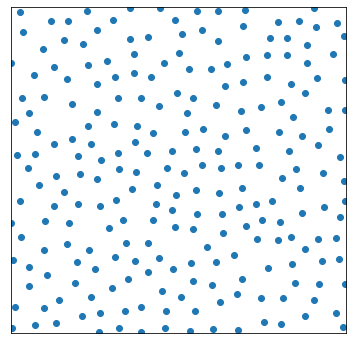

In [26]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 15460 edges


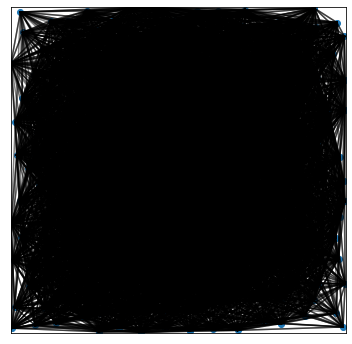

In [27]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 1160 edges


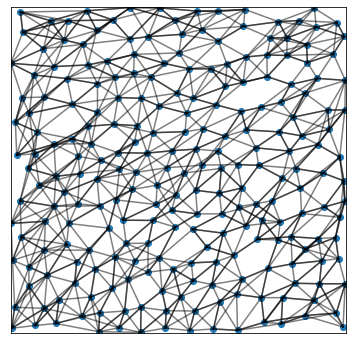

In [28]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 1154 edges


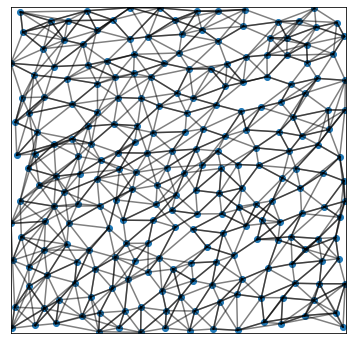

In [29]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 232 nodes and 6 edges


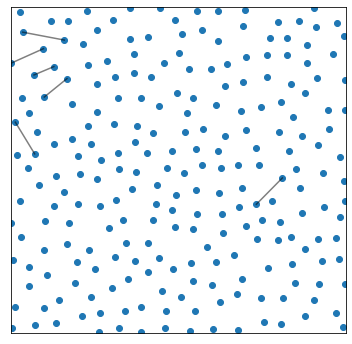

In [30]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)